<a href="https://colab.research.google.com/github/sandeep1847e/Phy654-data/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# all the necessary imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [37]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#**Ans 1**
# size of the images available in MNIST dataset




In [38]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)


# Visualizing 4 random images from training set

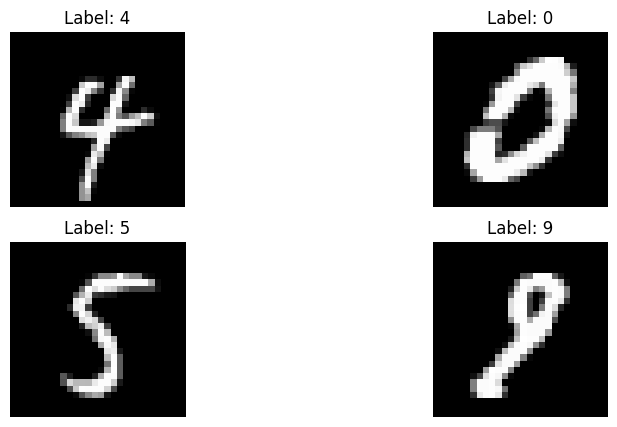

In [39]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_train))
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()


# Visualizing 4 random images from test set

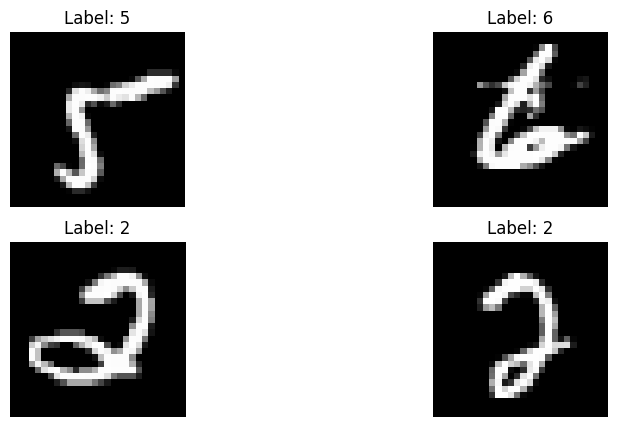

In [40]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_test))
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Label: {y_test[idx]}")
    plt.axis('off')
plt.show()


**Ans 2**

In [41]:
print("Number of training images:", len(x_train))
print("Number of testing images:", len(x_test))

Number of training images: 60000
Number of testing images: 10000


#**Preprocessing**


In [42]:
#reshaping and dividing by 255 to make the element of matrix in [0,1]
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [43]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#**Ans 3 to 8**

In [44]:
model = Sequential([
    Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),  # Ans3
    BatchNormalization(),
    AveragePooling2D((2, 2)),  # Ans 4

    Conv2D(16, (3, 3), padding='same', activation='relu'),  # Ans 5
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # Ans 6

    Conv2D(4, (1, 1), activation='relu'),  # Ans 7
    BatchNormalization(),
    #Ans 8
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 13, 13, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 6, 6, 8)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 6, 6, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3, 3, 4)             │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,798 (7.02 KB)

 Trainable params: 1,742 (6.80 KB)

 Non-trainable params: 56 (224.00 B)


# Ans 9
# Compile and fit


In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6924 - loss: 0.9816 - val_accuracy: 0.9503 - val_loss: 0.1595
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9534 - loss: 0.1473 - val_accuracy: 0.9655 - val_loss: 0.1125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9681 - loss: 0.1056 - val_accuracy: 0.9732 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0832 - val_accuracy: 0.9761 - val_loss: 0.0741
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9765 - loss: 0.0756 - val_accuracy: 0.9785 - val_loss: 0.0687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0742 - val_accuracy: 0.9783 - val_loss: 0.0671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9799 - loss: 0.0672 - val_accuracy: 0.9775 - val_loss: 0.0674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0631 

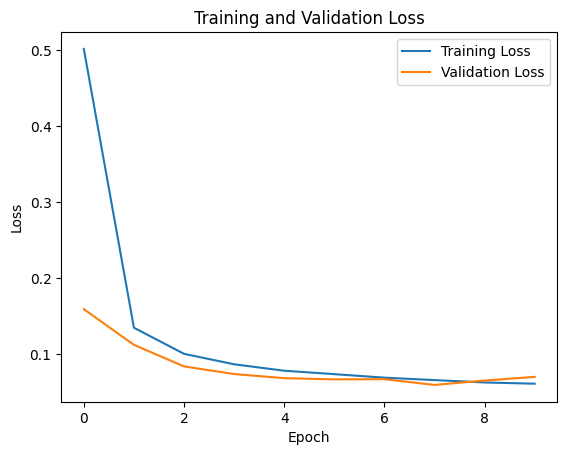

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 10. Evaluating on test set

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0891
Test accuracy: 97.80%
